<a href="https://colab.research.google.com/github/ashraf-badalov/web-scraping-projects/blob/main/notebook_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
base_url = "https://www.bakuelectronics.az/catalog/noutbuklar-komputerler/noutbuklar/"

product_titles = []
product_prices = []
for page_number in range(1,16):
  if page_number == 1:
    url = base_url
  else:
    url = base_url + f"?page={page_number}"

  response = requests.get(url)

  if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    notebook_elements = soup.find_all('div',class_ = "flex__row--start js_pagination_container")
    for i in notebook_elements:
      titles = [ title.text for title in i.find_all('a',class_ = "product__title")]
      product_titles.extend(titles)
      prices = [price.text for price in i.find_all('div',class_ = "product__price--cur")]
      product_prices.extend(prices)

  else:
    print(f"Failed to fetch page: {page_number}. Status Code: {response.status_code}.")

In [3]:
print(product_titles[:10])
print(len(product_titles))

['Apple MacBook Air 13 M1 2020 Gold (MGND3RU/A)', 'Notbuk ASUS TUF FX507ZC4-HN009/15.6 FHD/I5-12500H/16/512GB SSD/RTX 3050/FreeDoS/G(90NR0GW1-M000P0)', 'Notbuk ACER SFX14-51G/14 /i7-1260P/16/512GB SSD/RTX 3050 TI (NX.K0AER.004)', 'Notbuk Asus TUF Gaming F15 FX517ZC-HN051/15.6 FHD/i5-12450H/8/512GB SSD/RTX 3050/Free/B (90NR09L3-M008S0)', 'Notbuk ASUS TUF Dash F15/15.6 FHD/i5-12450H/8/512GB SSD/RTX 3050ti/FreeDoS/Black (90NR0951-M00820)', 'Notbuk Asus TUF Gaming A15 FA506QM-HN128/15.6 FHD/R7-5800H/16/1TB SSD/RTX 3060/FreeDoS/B (90NR0607-M004A0)', 'Apple MacBook Air M2/13.6 /8C CPU/8C GPU/256GB SSD/Midnight (MLY33RU/A)', 'Notbuk Asus A15 FA507RC-HN059/15.6 FHD/R7-6800H/8/512GB SSD/RTX 3050/FreeDoS/Gray(90NR09R2-M005W0)', 'Notbuk ASUS VivoBook 15 F1500EA/15.6 FHD/i3-1115G4/12/512GB SSD/UHD Grap/Win11/Bl (90NB0TY5-M013V0)', 'Notbuk LENOVO IdeaPad 3 15ITL6/15.6"FHD/i5-1135G7/8/512GB SSD/MX350 2GB/FreeDos (82H802QQRK-N)']
285


In [4]:
print(product_prices[:10])
print(len(product_prices))

['2499.99 ', '2889.99 ', '3499.99 ', '2619.99 ', '2799.99 ', '3499.99 ', '3249.99 ', '2449.99 ', '1699.99 ', '1699.99 ']
285


In [5]:
import csv

filename = "notebooks.csv"
rows = zip(product_titles,product_prices)

with open(filename, 'w', newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['product_title', 'price'])
  for row in rows:
    writer.writerow(row)
print("CSV file created successfully")

CSV file created successfully


In [6]:
import numpy as np
import pandas as pd

data = pd.read_csv("notebooks.csv")
data.head(10)

,product_title,price
0,Apple MacBook Air 13 M1 2020 Gold (MGND3RU/A),2499.99
1,Notbuk ASUS TUF FX507ZC4-HN009/15.6 FHD/I5-125...,2889.99
2,Notbuk ACER SFX14-51G/14 /i7-1260P/16/512GB SS...,3499.99
3,Notbuk Asus TUF Gaming F15 FX517ZC-HN051/15.6 ...,2619.99
4,Notbuk ASUS TUF Dash F15/15.6 FHD/i5-12450H/8/...,2799.99
5,Notbuk Asus TUF Gaming A15 FA506QM-HN128/15.6 ...,3499.99
6,Apple MacBook Air M2/13.6 /8C CPU/8C GPU/256GB...,3249.99
7,Notbuk Asus A15 FA507RC-HN059/15.6 FHD/R7-6800...,2449.99
8,Notbuk ASUS VivoBook 15 F1500EA/15.6 FHD/i3-11...,1699.99
9,"Notbuk LENOVO IdeaPad 3 15ITL6/15.6""FHD/i5-113...",1699.99


In [7]:
import re

pattern = r'^Notbuk\s+(\w+)\b'

data['brand'] = data['product_title'].apply(lambda x: re.findall(pattern,x)[0] if re.match(pattern,x) else x.split()[0])
data['brand'] = data['brand'].str.upper()
data.head()

,product_title,price,brand
0,Apple MacBook Air 13 M1 2020 Gold (MGND3RU/A),2499.99,APPLE
1,Notbuk ASUS TUF FX507ZC4-HN009/15.6 FHD/I5-125...,2889.99,ASUS
2,Notbuk ACER SFX14-51G/14 /i7-1260P/16/512GB SS...,3499.99,ACER
3,Notbuk Asus TUF Gaming F15 FX517ZC-HN051/15.6 ...,2619.99,ASUS
4,Notbuk ASUS TUF Dash F15/15.6 FHD/i5-12450H/8/...,2799.99,ASUS


In [8]:
pattern = r'(\d+TB|\d+GB)'
data['storage_capacity'] = data['product_title'].apply(lambda x: max(re.findall(pattern, x), key=len) if re.findall(pattern, x) else np.nan)
data.head()

,product_title,price,brand,storage_capacity
0,Apple MacBook Air 13 M1 2020 Gold (MGND3RU/A),2499.99,APPLE,NaN
1,Notbuk ASUS TUF FX507ZC4-HN009/15.6 FHD/I5-125...,2889.99,ASUS,512GB
2,Notbuk ACER SFX14-51G/14 /i7-1260P/16/512GB SS...,3499.99,ACER,512GB
3,Notbuk Asus TUF Gaming F15 FX517ZC-HN051/15.6 ...,2619.99,ASUS,512GB
4,Notbuk ASUS TUF Dash F15/15.6 FHD/i5-12450H/8/...,2799.99,ASUS,512GB


In [9]:
data['storage_capacity'].fillna(method='ffill', inplace=True)
data['storage_capacity'].fillna(method='bfill', inplace=True)
data.head()

,product_title,price,brand,storage_capacity
0,Apple MacBook Air 13 M1 2020 Gold (MGND3RU/A),2499.99,APPLE,512GB
1,Notbuk ASUS TUF FX507ZC4-HN009/15.6 FHD/I5-125...,2889.99,ASUS,512GB
2,Notbuk ACER SFX14-51G/14 /i7-1260P/16/512GB SS...,3499.99,ACER,512GB
3,Notbuk Asus TUF Gaming F15 FX517ZC-HN051/15.6 ...,2619.99,ASUS,512GB
4,Notbuk ASUS TUF Dash F15/15.6 FHD/i5-12450H/8/...,2799.99,ASUS,512GB


In [15]:
min_price = data[data['price'] == data['price'].min()]
min_price

,product_title,price,brand,storage_capacity
240,Notbuk Acer Aspire 3 A315-22G (9NX.HE7ER.001),599.99,ACER,512GB


In [35]:
max_price = data[data['price'] == data['price'].max()]
max_price

,product_title,price,brand,storage_capacity
208,Notbuk Lenovo Legion 7 16ITHg6 (82K60024RK-N),6999.99,LENOVO,8GB


In [34]:
data['price'].mean()

2353.7970526315785

In [29]:
grouped = data.groupby('brand')['product_title'].count()
print(grouped)

brand
ACER       51
APPLE      14
ASUS       61
DELL        8
HP         54
HUAWEI      7
LAPTOP      1
LENOVO     72
MSI        13
NOUTBUK     2
SPIN        1
TOSHIBA     1
Name: product_title, dtype: int64


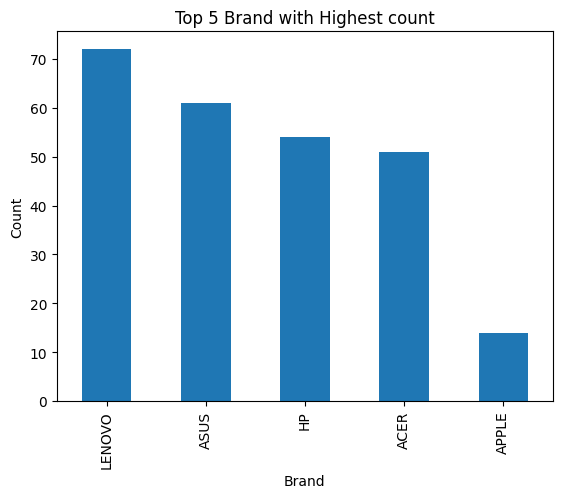

In [32]:
import matplotlib.pyplot as plt

sorted = grouped.sort_values(ascending=False)
top_5 = sorted.head(5)
top_5.plot(kind = 'bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 5 Brand with Highest count')
plt.show()

In [40]:
mean_price_by_brand = data.groupby('brand')['price'].mean()
print(mean_price_by_brand)

brand
ACER       2202.146863
APPLE      4167.132857
ASUS       2666.711311
DELL       1603.740000
HP         1884.360370
HUAWEI     1742.847143
LAPTOP     1149.990000
LENOVO     2252.198472
MSI        2897.682308
NOUTBUK    2874.990000
SPIN       2299.990000
TOSHIBA    1699.990000
Name: price, dtype: float64
